In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
loans_df=pd.read_csv("loans.csv")

In [4]:
loans_df.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default
0,380415,2017-10-13,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,8885.0,547.0,1000.0,0
1,153249,2017-09-06,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,3807.0,506.0,2050.0,0
2,82776,2017-09-25,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,13883.0,554.0,500.0,0
3,190996,2017-06-23,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,13481.0,569.0,200.0,0
4,375566,2017-08-23,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,19227.4,633.0,7000.0,0


In [5]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
Customer_WID         500000 non-null int64
DisbursementDate     500000 non-null object
Age                  499989 non-null float64
CustomerType         499989 non-null float64
SOR                  499989 non-null float64
MonthsSinceOpen      499989 non-null float64
MonthsSinceActive    499989 non-null float64
FinancialMeasure1    499989 non-null float64
FinancialMeasure2    499989 non-null float64
FinancialMeasure3    499989 non-null float64
FinancialMeasure4    499989 non-null float64
CRBScore             499989 non-null float64
Amount               500000 non-null float64
Default              500000 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 53.4+ MB


In [6]:
loans_df.describe()

,Customer_WID,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default
count,500000.000000,499989.000000,499989.000000,499989.000000,499989.000000,499989.000000,4.999890e+05,4.999890e+05,4.999890e+05,4.999890e+05,499989.000000,500000.000000,500000.000000
mean,208928.520236,37.999568,1.279290,4.781061,89.711334,0.000004,1.535980e+04,1.190511e+04,1.009236e+05,1.018893e+05,586.127537,9155.098668,0.023830
std,120648.505833,10.986557,0.448664,0.910897,33.675991,0.002828,3.584068e+04,5.380335e+04,7.665491e+05,7.765588e+05,109.543161,16812.813799,0.152519
min,2.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000e+00,-4.523452e+06,0.000000e+00,0.000000e+00,0.000000,100.000000,0.000000
25%,104443.750000,30.000000,1.000000,4.000000,65.000000,0.000000,0.000000e+00,7.661200e+02,1.186523e+04,1.109770e+04,547.000000,2000.000000,0.000000
50%,209088.500000,36.000000,1.000000,5.000000,96.000000,0.000000,0.000000e+00,2.819820e+03,1.939200e+04,1.861900e+04,603.000000,4900.000000,0.000000
75%,313030.250000,44.000000,2.000000,5.000000,116.000000,0.000000,2.076600e+04,7.417820e+03,3.872886e+04,3.740300e+04,653.000000,9900.000000,0.000000
max,418241.000000,118.000000,3.000000,8.000000,144.000000,2.000000,2.186055e+06,5.705195e+06,9.747924e+07,9.467495e+07,747.000000,200000.000000,1.000000


In [7]:
#null values in the dataset
loans_df.isnull().sum()

Customer_WID          0
DisbursementDate      0
Age                  11
CustomerType         11
SOR                  11
MonthsSinceOpen      11
MonthsSinceActive    11
FinancialMeasure1    11
FinancialMeasure2    11
FinancialMeasure3    11
FinancialMeasure4    11
CRBScore             11
Amount                0
Default               0
dtype: int64

In [8]:
#drop the null values
loans_df=loans_df.dropna()

In [9]:
#null values dropped
loans_df.isnull().sum()

Customer_WID         0
DisbursementDate     0
Age                  0
CustomerType         0
SOR                  0
MonthsSinceOpen      0
MonthsSinceActive    0
FinancialMeasure1    0
FinancialMeasure2    0
FinancialMeasure3    0
FinancialMeasure4    0
CRBScore             0
Amount               0
Default              0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

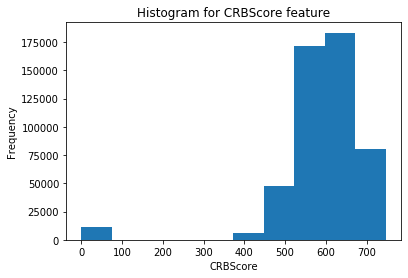

In [10]:
plt.hist(loans_df['CRBScore'])
plt.title("Histogram for CRBScore feature")
plt.xlabel("CRBScore")
plt.ylabel("Frequency")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

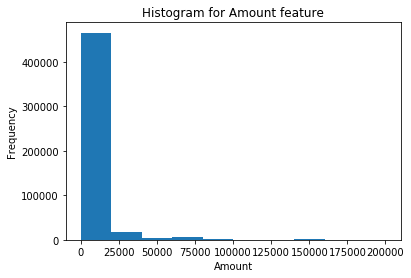

In [11]:
plt.hist(loans_df['Amount'])
plt.title("Histogram for Amount feature")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show

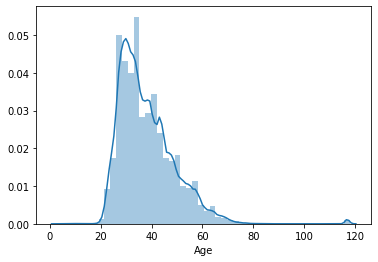

In [12]:
#Distribution of the age feature
sns.distplot(loans_df["Age"])

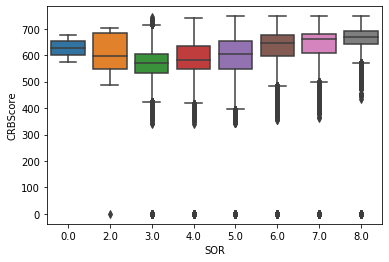

In [13]:
sns.boxplot(x="SOR",y="CRBScore",data=loans_df)

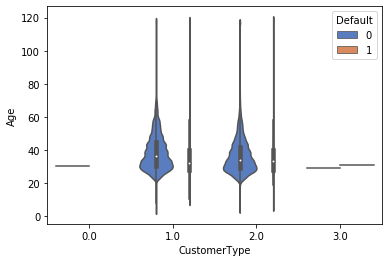

In [14]:
#violin plot showing Default distribution along age and customertype
ax = sns.violinplot(x="CustomerType", y="Age", hue="Default",data=loans_df, palette="muted",scale="count")

In [15]:
loans_df['SOR'].value_counts()

5.0    311027
4.0     86345
3.0     51469
6.0     26789
7.0     19890
8.0      4443
2.0        24
0.0         2
Name: SOR, dtype: int64

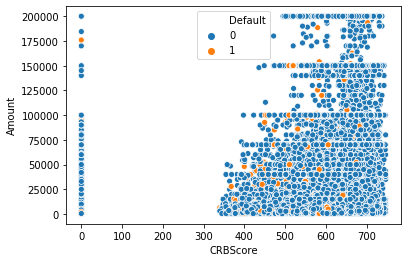

In [16]:
sns.scatterplot(x="CRBScore",y="Amount",hue="Default",data=loans_df)

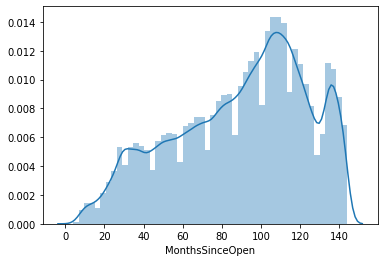

In [17]:
sns.distplot(loans_df["MonthsSinceOpen"])

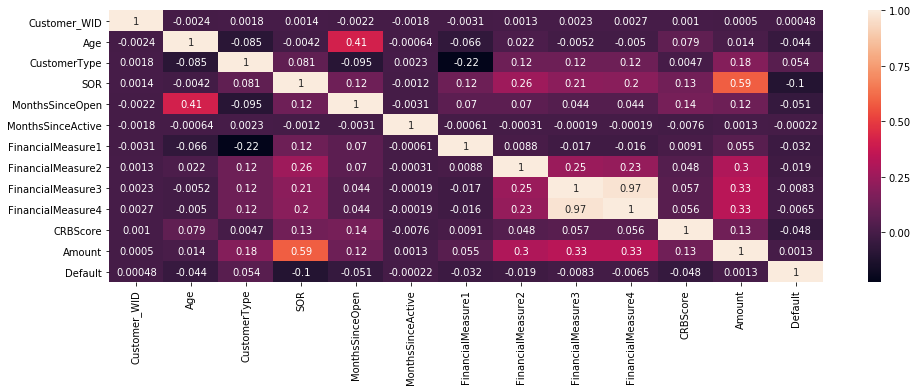

In [18]:
# correlation heatmap
correlation=loans_df.corr()
plt.figure(figsize=(16,5))
# plot correlation matrix
ax = sns.heatmap(correlation, annot=True)

# Feature selection

MothsSinceActive and Customer_WID  are very uncorrelated to Default as illustrated by the heatmap.Their correlation with default lies in the ten of thousandths.So these fields shall be dropped.Financial measure 3 and financial measure 4 are highly correlated so one of the two features needs to be dropped in training the model.Disbursementdate will also be dropped as it adds little value to training of the model.

In [19]:
modified_loans_df=loans_df.drop(["Customer_WID","MonthsSinceActive","DisbursementDate","FinancialMeasure3"],axis=1)

In [20]:
modified_loans_df.head()

,Age,CustomerType,SOR,MonthsSinceOpen,FinancialMeasure1,FinancialMeasure2,FinancialMeasure4,CRBScore,Amount,Default
0,27.0,1.0,3.0,53.0,0.0,25.85,8885.0,547.0,1000.0,0
1,54.0,1.0,3.0,142.0,0.0,12.05,3807.0,506.0,2050.0,0
2,44.0,2.0,5.0,70.0,0.0,369.04,13883.0,554.0,500.0,0
3,30.0,1.0,5.0,93.0,0.0,403.01,13481.0,569.0,200.0,0
4,36.0,1.0,5.0,116.0,39678.0,2143.38,19227.4,633.0,7000.0,0


In [21]:
#initializing x and y variables
x=modified_loans_df.drop("Default",axis=1)

In [22]:
x.head()

,Age,CustomerType,SOR,MonthsSinceOpen,FinancialMeasure1,FinancialMeasure2,FinancialMeasure4,CRBScore,Amount
0,27.0,1.0,3.0,53.0,0.0,25.85,8885.0,547.0,1000.0
1,54.0,1.0,3.0,142.0,0.0,12.05,3807.0,506.0,2050.0
2,44.0,2.0,5.0,70.0,0.0,369.04,13883.0,554.0,500.0
3,30.0,1.0,5.0,93.0,0.0,403.01,13481.0,569.0,200.0
4,36.0,1.0,5.0,116.0,39678.0,2143.38,19227.4,633.0,7000.0


In [23]:
y=modified_loans_df["Default"]

In [24]:
#training and testing  data
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [25]:
# concatenate training data back together
X=pd.concat([X_train,y_train],axis=1)

In [26]:
#seperate minority and majority classes
non_default=X[X.Default==0]
default=X[X.Default==1]

In [27]:
#upsample minority
default_upsampled=resample(default,replace=True, # sample with replacement
                          n_samples=len(non_default), # match number in majority class
                          random_state=27) # reproducible results

In [28]:
# combine majority and upsampled minority
upsampled = pd.concat([non_default, default_upsampled])


In [29]:
upsampled.Default.value_counts()

1    390424
0    390424
Name: Default, dtype: int64

In [30]:
len(X_train)

399991

In [31]:
len(X_test)

99998

In [32]:
y_train=upsampled.Default
X_train=upsampled.drop('Default',axis=1)

In [33]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [35]:
upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [36]:
upsampled_pred=upsampled.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,upsampled_pred)

array([[70463, 27187],
       [  733,  1615]], dtype=int64)

In [38]:
accuracy_score(y_test,upsampled_pred)

0.7207944158883177

In [39]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf=RandomForestClassifier()

In [41]:
rf.fit(X_train,y_train)

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
y_pred_rf=rf.predict(X_test)

In [43]:
confusion_matrix(y_pred_rf,y_test)

array([[97399,  2230],
       [  251,   118]], dtype=int64)

In [44]:
accuracy_score(y_test,y_pred_rf)

0.9751895037900759

In [45]:
#Decision tree classifier
DecisionTreeModel=DecisionTreeClassifier()
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
DecisionTree_ypred=DecisionTreeModel.predict(X_test)

In [47]:
confusion_matrix(DecisionTree_ypred,y_test)

array([[95582,  2080],
       [ 2068,   268]], dtype=int64)

In [48]:
accuracy_score(DecisionTree_ypred,y_test)

0.9585191703834076

In [49]:
#xgboost classifier
xgb_model=XGBClassifier()

In [50]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [51]:
xgb_pred=xgb_model.predict(X_test)

In [52]:
confusion_matrix(xgb_pred,y_test)

array([[76467,   668],
       [21183,  1680]], dtype=int64)

In [53]:
accuracy_score(xgb_pred,y_test)

0.7814856297125943

In [54]:
pickle.dump(rf, open('RandomForest_model.pkl','wb'))

In [55]:
model = pickle.load(open('RandomForest_model.pkl','rb'))
print(model.predict([[1.8,54,356,38,89,38,39,839,6773]]))

[0]


In [56]:
pickle.dump(DecisionTreeModel, open('DecisionTree_model.pkl','wb'))

In [57]:
model = pickle.load(open('DecisionTree_model.pkl','rb'))
print(model.predict([[1.8,54,356,38,89,38,39,839,6773]]))

[0]


In [58]:
pickle.dump(xgb_model, open('xgb_model.pkl','wb'))

In [59]:
model = pickle.load(open('xgb_model.pkl','rb'))
print(model.predict([[1.8,54,356,38,89,38,39,839,6773]]))

[0]
